In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Step 1 - Climate Analysis and Exploration

## Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station= Base.classes.station
Measurement= Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session= Session(engine)

In [10]:
#Station Table: display row's columns & data in disctionary format: 
first_row= session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18864feaa88>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0}

In [11]:
#Measurement Table: display row's columns & data in disctionary format: 
first_row= session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18864fd8548>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

## Exploratory Climate Analysis

In [12]:
#Find last data point in the database
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
one_year_before= dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_before

# Perform a query to retrieve the data and precipitation scores
precipitation= session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= one_year_before).all()
precipitation

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp= pd.DataFrame(precipitation, columns=['date', 'precipitation'])
df_prcp.set_index('date', inplace=True)

# Sort the dataframe by date
df_prcp.sort_values(by="date")

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


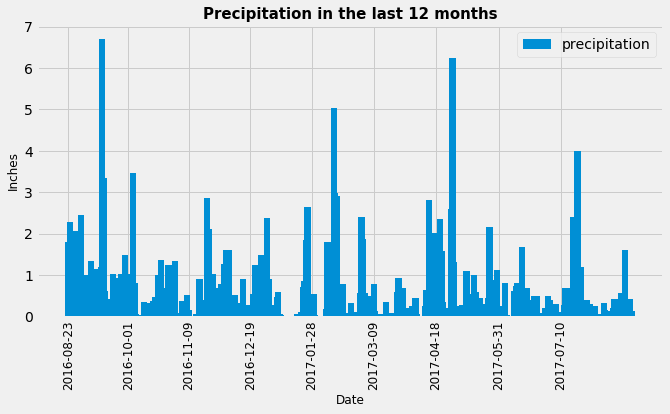

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
xticks=["2016-08-23", "2016-10-01", "2016-11-09","2016-12-19", "2017-01-28", "2017-03-09",\
        "2017-04-18", "2017-05-31", "2017-07-10"]

plt.figure(figsize=(10,5))
plt.bar(df_prcp.index, df_prcp["precipitation"], label="precipitation", width= 4)
plt.legend(loc="best")
plt.title("Precipitation in the last 12 months", fontsize=15, fontweight="bold")
plt.ylabel("Inches", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.xticks(ticks=xticks, labels= xticks, rotation=90, fontsize=12)

plt.savefig("Results/precipitation_barplot.png")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
tot_stations=session.query(Station.id).count()
tot_stations

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
selection=[func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

temp_info=session.query(*selection).filter(Measurement.station == active_stations[0][0]).all()
temp_info
df_most_active=pd.DataFrame(temp_info, columns=["Lowest Temp", "Highest Temp", "Average Temp"])
df_most_active

,Lowest Temp,Highest Temp,Average Temp
0,54.0,85.0,71.663781


In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date 1 year ago from the last data point in the database
one_year_before= dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_before

# Perform a query to retrieve the data and precipitation scores
tobs= session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.date >= one_year_before).filter(Measurement.station == "USC00519281").all()
tobs

# Save the query results as a Pandas DataFrame and set the index to the date column
df_tobs= pd.DataFrame(tobs, columns=['date', 'tobs'])
df_tobs.set_index('date', inplace=True)

# Sort the dataframe by date
df_tobs.sort_values(by="date")

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


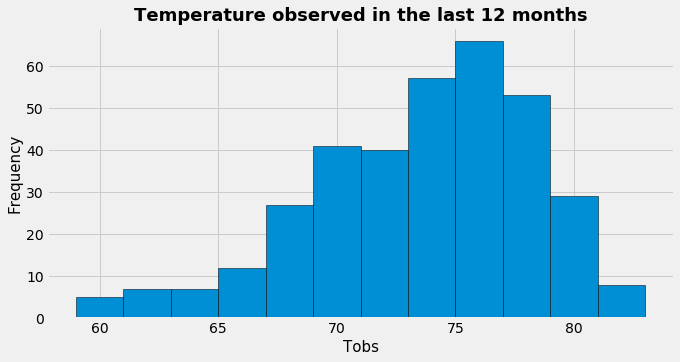

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
# xticks=["2016-08-23", "2016-10-01", "2016-11-09", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]
plt.figure(figsize=(10,5))
plt.hist(df_tobs["tobs"], bins=12, edgecolor="black")

plt.title("Temperature observed in the last 12 months", fontsize=18, fontweight="bold")
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Tobs", fontsize=15)

plt.savefig("Results/tobs_histo.png")

## Bonus Challenge Assignment

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
